# Traitement de données climatiques
**Marc BUFFAT, dpt mécanique, Université Lyon 1**

![temp_terre.png](Images/temp_terre.png)

## Objectifs

Exemple de traitement de données pour des étudiants en Licence L2 Mécanique

- étude du réchauffement climatique
- à partir de mesures annuelles globales depuis 100 ans [University Corporation for Atmospheric Research](https://www2.ucar.edu/climate/faq/how-much-has-global-temperature-risen-last-100-years)
- mesures de l'[anomalie de température globale](https://www.ncdc.noaa.gov/monitoring-references/faq/anomalies.php) qui désigne la différence de température par rapport à une valeur de référence ou à une moyenne à long terme.  
- voir la video de la NASA ci-dessous

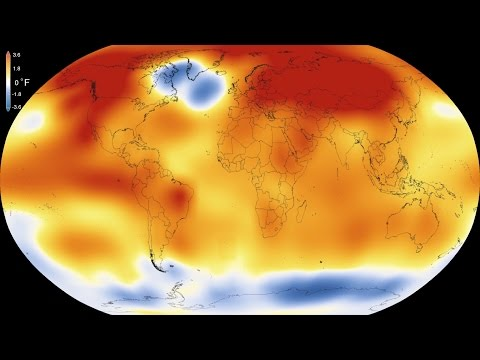

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('gGOzHVUQCw0')

## Méthodes
utilisation des bibliothèques python numpy et matplotlib pour faire un traitement numérique

1. lecture des données 
2. tracer des données brutes
3. lissage des données
4. prédiction


## Lecture des données

en tenant compte de la structure de la base de données

In [3]:
!head './data/land_global_temperature_anomaly.csv'

Global Land and Ocean Temperature Anomalies, January
Units: Degrees Celsius
Base Period: 1901-2000
Missing: -999
Year,Value
1880,-0.06
1881,-0.09
1882,0.08
1883,-0.28
1884,-0.24


In [4]:
import numpy as np

fichier = './data/land_global_temperature_anomaly.csv'

annee, anomalie_temp = np.loadtxt(fichier, delimiter=',', skiprows=5, unpack=True)

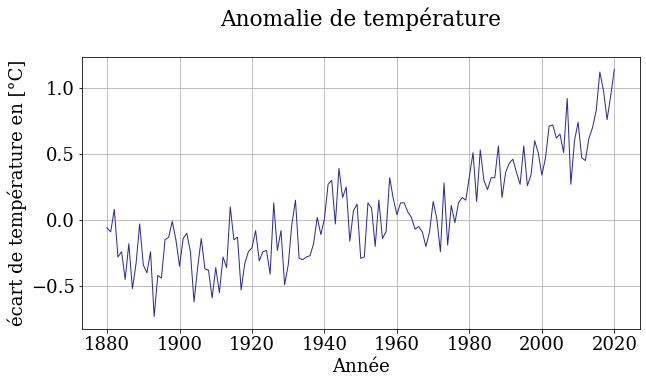

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', family='serif', size='18')
# augmente la taille de la figure
plt.figure(figsize=(10,5))
# tracer
plt.plot(annee, anomalie_temp, color='#2929a3', linestyle='-', linewidth=1) 
plt.title('Anomalie de température\n')
plt.xlabel('Année')
plt.ylabel('écart de température en [°C]')
plt.grid();

## Lissage des données

utilisation d'un lissage par régression linéire (moindres carrés) avec la bibliothèque numpy

In [6]:
# calcul avec NumPy en notant a_1n, a_0n les variables contenant les 2 coefficients
a_1n, a_0n = np.polyfit(annee, anomalie_temp, 1)
f_lineaire = np.poly1d((a_1n, a_0n)) 
print("lissage: Ecart T = {:.2f} annee + {:.2f}".format(a_1n,a_0n))

lissage: Ecart T = 0.01 annee + -15.24


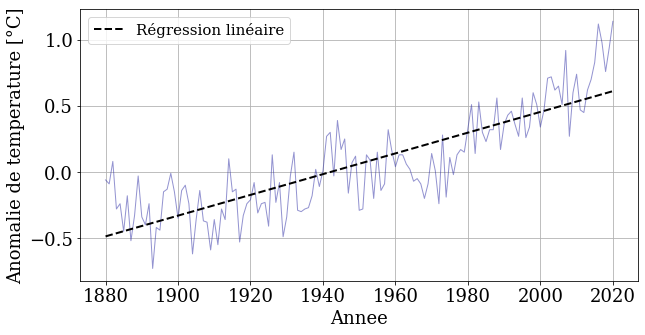

In [12]:
plt.figure(figsize=(10, 5))

plt.plot(annee, anomalie_temp, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5) 
plt.plot(annee, f_lineaire(annee), 'k--', linewidth=2, label='Régression linéaire')
plt.xlabel('Annee')
plt.ylabel('Anomalie de temperature [°C]')
plt.legend(loc='best', fontsize=15)
plt.grid();

In [8]:
print("Prédiction en 2030: Ecart T={:.2f}".format(f_lineaire(2030)))

Prédiction en 2030: Ecart T=0.69


## Amélioration du modèle de prédiction

Sur la courbe on remarque que vers 1970, la température commence à augmenter plus rapidement que la tendance précédente.


In [9]:
i1 = np.where(annee == 1970 )[0][0]
print("limite ",i1)
annee_1 , anomalie_temp_1 = annee[0:i1], anomalie_temp[0:i1]
annee_2 , anomalie_temp_2 = annee[i1:],  anomalie_temp[i1:]

m1, b1 = np.polyfit(annee_1, anomalie_temp_1, 1)
m2, b2 = np.polyfit(annee_2, anomalie_temp_2, 1)

f_linear_1 = np.poly1d((m1, b1))
f_linear_2 = np.poly1d((m2, b2))

limite  90


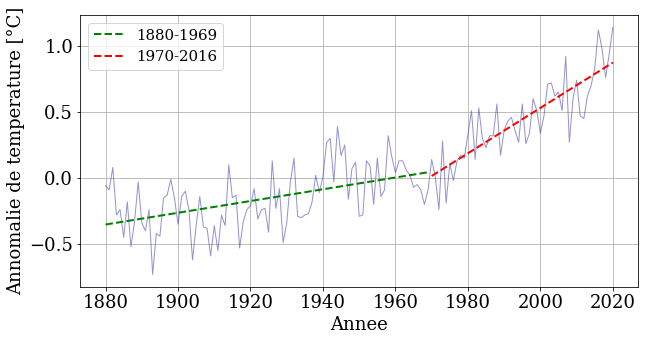

In [10]:
plt.figure(figsize=(10, 5))

plt.plot(annee, anomalie_temp, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5) 
plt.plot(annee_1, f_linear_1(annee_1), 'g--', linewidth=2, label='1880-1969')
plt.plot(annee_2, f_linear_2(annee_2), 'r--', linewidth=2, label='1970-2016')

plt.xlabel('Annee')
plt.ylabel('Annomalie de temperature [°C]')
plt.legend(loc='best', fontsize=15)
plt.grid();

In [11]:
print("Prédiction en 2030: Ecart T={:.2f}".format(f_linear_2(2030)))

Prédiction en 2030: Ecart T=1.04


## Conclusion

Nous avons obtenu deux courbes différentes pour mieux décrire nos données. 

Un petit problème subsiste, car le point final de notre première régression ne correspond pas au point de départ de la deuxième régression. Nous l'avons fait dans le but d'apprendre, mais ce n'est pas rigoureusement correct. Il faudrait donc améliorer le modèle, ce qui est possible, mais hors du champ de cette leçon.